## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 8.7: optical image of the Crab nebula, a supernova remnant in the energy conserving phase of evolution

#### data from skyview (DSS2 red)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
%matplotlib inline

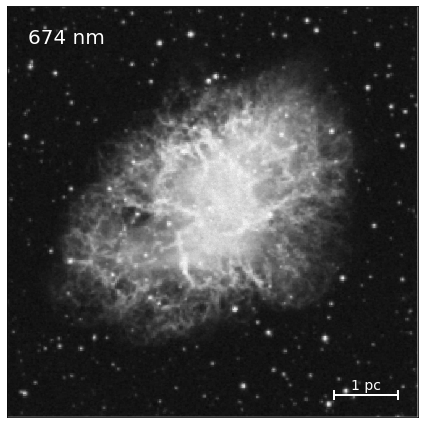

In [4]:
fig = plt.figure(figsize=(6,6))

hdu = fits.open('crab_dss2_red.fits')
wcs1 = WCS(hdu[0])
ax1 = fig.add_subplot(111, projection=wcs1)
im1 = hdu[0].data
hd1 = hdu[0].header

# 8'
imin, imax = 167, 833
jmin, jmax = 167, 833

ax1.imshow(im1[imin:imax, jmin:jmax], cmap='gray', origin='lower', vmin=2600, vmax=25100)
hdu.close()

# scale bar
ax1.set_xlim(0,imax-imin-1)
ax1.set_ylim(0,jmax-jmin-1)
dx = hd1['CDELT1']
# 0.72 arcsec per pixel = 0.007 pc at 2 kpc
xbar = 103.1
x0 = 530
x1 = x0 + xbar
y0 = 35
dy = 6
ax1.plot([x0,x1],[y0,y0], 'w-', lw=2)
ax1.plot([x0,x0],[y0-dy,y0+dy], 'w-', lw=2)
ax1.plot([x1,x1],[y0-dy,y0+dy], 'w-', lw=2)
ax1.text(0.5*(x0+x1), y0+1.5*dy, '1 pc', color='white', fontsize=14, ha='center')

for i in (0,1):
    ax1.coords[i].set_ticks_visible(False)
    ax1.coords[i].set_ticklabel_visible(False)
    ax1.coords[i].set_ticks_visible(False)
    ax1.coords[i].set_ticklabel_visible(False)
    ax1.coords[i].set_axislabel('')
    ax1.coords[i].set_axislabel('')
ax1.text(0.05, 0.91, '674 nm', {'color': 'white', 'fontsize': 20}, transform=ax1.transAxes)

fig.tight_layout()
plt.savefig('crab_SNR.pdf')